In [39]:
import numpy as np
from numpy import genfromtxt
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#%matplotlib inline

# Import the data

The data is saved in a comma seperated file using the delimeter ','. This means that each data instance is seperated by a comma. 

In [52]:
my_data = genfromtxt('dataBank.csv', delimiter=',')

X, Y = my_data[:, 1:4], my_data[:, 4]

print(X.shape)
print(Y.shape)

print(X[0:3, :])
print(Y[0:3])

(162501, 3)
(162501,)
[[ 1502.  2215.  2153.]
 [ 1667.  2072.  2047.]
 [ 1611.  1957.  1906.]]
[ 1.  1.  1.]


# Split the data

Split the data into train/test set. 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

#X_train = X_train[0:5000]
#y_train = y_train[0:5000]

#X_test = X_test[0:1000]
#y_test = y_test[0:1000]

print(y_train)

(108875, 3)
(108875,)
(53626, 3)
(53626,)
[ 7.  1.  5. ...,  7.  3.  3.]


# Visualize the data

Visualize the 3-dimensional data to see how the labels are grouped. We can see that their is no clear linearly differentiable seperator of the data. 

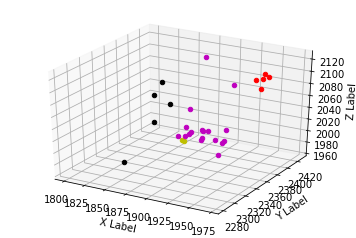

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import where

# Plots 2 features, with an output, shows the decision boundary
def plot3D(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    pos = where(y == 1)
    neg = where(y == 0)
    
    color = ['r', 'b', 'y', 'k', 'g', 'c', 'm']
    
    for i in range(30):
        ax.scatter(x[i, 0], x[i, 1],x[i, 2], marker='o', c=color[int(y[i])-1])
    #ax.scatter(x[:,1], x[:,2], y)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    axes = plt.axis()
    plt.show()
    
plot3D(X_train, y_train)

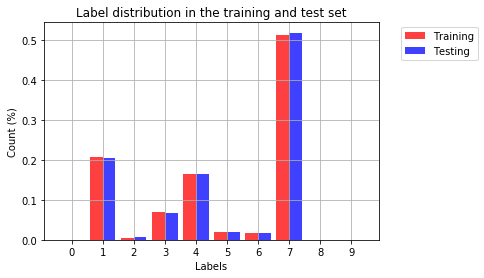

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

training_counts = [None] * 10 
testing_counts = [None] * 10
for i in range(10):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(10)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(10)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1,2,3,4,5,6,7,8,9))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

# Support Vector Classifier (SVC)

In [54]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train[0:5000], y_train[0:5000])

clf.score(X_test, y_test)

0.66227203222317532

# Decision Trees

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.77908104277775703

# Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators = 100)

forest = forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)

Score:  0.838996009398


array([[ 95.445,   0.036,   0.027,   2.02 ,   0.226,   0.054,   2.192],
       [  7.692,   7.372,   3.846,  41.987,   4.808,   0.321,  33.974],
       [  0.247,   0.137,  32.183,   6.957,   0.767,   0.794,  58.915],
       [  2.315,   0.113,   1.112,  83.214,   1.771,   0.67 ,  10.805],
       [  3.653,   0.197,   0.79 ,  46.594,  31.688,   0.592,  16.486],
       [  1.353,   0.104,   6.139,  65.14 ,   2.497,   4.058,  20.708],
       [  0.744,   0.115,   3.93 ,   3.028,   0.194,   0.187,  91.802]])

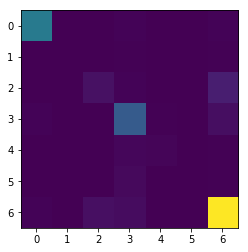

In [50]:
from sklearn.metrics import confusion_matrix

# Show a confusion matrix
plt.imshow(confusion_matrix(y_test, predictions))
conf = confusion_matrix(y_test, predictions)

# Print the confusion matrix
np.round([conf[ix, :]*100/i for ix, i in enumerate(np.sum(conf, 1))], 3)